In [2]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, DifferentialEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqand{\qquad\hbox{for}\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\norm#1{\left\|#1\right\|}
\def\half{{1 \over 2}}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes


# Lecture 17: Differential equations satisfied by orthogonal polynomials


This lecture we do the following:

1. Differential equations for orthogonal polynomials
    - Sturm–Liouville equations
    - Weighted differentiation for ultraspherical polynomials
    - Differential equation for ultraspherical polynomials
2. Application: Eigenstates of Schrödinger operators with quadratic potentials
2. Rodriguez formulae
    


The three classical weights are (Hermite) $w(x) = \E^{-x^2}$, (Laguerre) $w_\alpha(x) = x^\alpha \E^{-x}$ and (Jacobi) $w_{\alpha,\beta}(x) = (1-x)^\alpha (1+x)^\beta$.  Note all weights form a simple hierarchy: when differentiated, they give a linear polynomial times the previous weight in the hierarchy.  For Hermite,
$$
{\D \over \dx} w(x) = -2x w(x)
$$
for Laguerre,
$$
{\D \over \dx} w^{(\alpha)}(x) = (\alpha  - x) w^{(\alpha-1)}(x)
$$
and for Jacobi
$$
{\D \over \dx} w^{(\alpha,\beta)}(x) = (\beta(1-x) - \alpha(1+x)) w^{(\alpha-1,\beta-1)}(x)
$$
These relationships  lead to simple differential equations that have the classical orthogonal polynomials as eigenfunctions.
    
### Sturm–Liouville operator
We first consider a simple class of operators that are self-adjoint:

**Proposition (Sturm–Liouville self-adjointness)** Consider the weighted inner product
$$
\ip<f,g>_w = \int_a^b f(x) g(x) w(x) \dx
$$
then for any continuously differentiable function $q(x)$ satisfying $q(a) = q(b) = 0$, the operator
$$
Lu = {1 \over w(x)} {\D \over \dx}\left[ q(x) {\D u\over \dx} \right]
$$
is self-adjoint in the sense 
$$
\ip<L f,g>_w = \ip<f, Lg>_w
$$

**Proof** Simple integration by parts argument:
$$
\ip<L f,g>_w = \int_a^b {\D \over \dx}\left[ q(x) {\D u\over \dx}\right]  g(x)\dx =  -\int_a^b q(x) {\D u\over \dx}    {\D g\over \dx} \dx =  \int_a^b   u(x)  {\D \over \dx}  q(x) {\D g\over \dx} \dx =  \int_a^b   u(x)  {1 \over w(x)} {\D \over \dx}\left[q(x) {\D g\over \dx}\right] w(x) \dx = \ip<f, Lg>_w
$$

⬛️

We claim that the classical orthogonal polynomials are eigenfunctions of a Sturm–Liouville problem, that is, in each case there exists a $q(x)$ so that 
$$
L p_n(x) = \lambda_n p_n(x)
$$
where $\lambda_n$ is the (real) eigenvalue. We will derive this for the ultraspherical polynomials.


### Weighted differentiation for ultraspherical polynomials

We have already seen that Chebyshev and ultraspherical polynomials have simple expressions for derivatives where we decrement the degree and increment the parameter:
\begin{align*}
{\D \over \dx } T_n(x) = n U_{n-1}(x) = n C_{n-1}^{(1)}(x) \\
{\D \over \dx } C_n^{(\lambda)}(x) = 2 \lambda C_{n-1}^{(\lambda+1)}(x)
\end{align*}
In this section, we see that differentiating the weighted polynomials actually decrements the parameter and increments the degree:

**Proposition (weighted differentiation)**
\begin{align*}
{\D \over \dx }[\sqrt{1-x^2} U_n(x)] = - {n+1 \over \sqrt{1-x^2}} T_{n+1}(x) \\
{\D \over \dx }[(1-x^2)^{\lambda-\half} C_n^{(\lambda)}(x)] = -{(n+1) (n+2 \lambda-1) \over 2 (\lambda-1) }  (1-x^2)^{\lambda - {3 \over 2}} C_{n+1}^{(\lambda-1)}(x)
\end{align*}

**Proof** We show the first result by showing that the left-hand side is orthogonal to all  polynomials of degree less than $n+1$ by integration by parts:
$$
\ip< \sqrt{1-x^2} {\D \over \dx }[\sqrt{1-x^2} U_n(x)], p_m(x)>_{\rm T} = -\int_{-1}^1 \sqrt{1-x^2} U_n(x) p_m' \dx =0
$$
Note that
$$
\sqrt{1-x^2} {\D \over \dx } \sqrt{1-x^2} f(x) = (1-x^2) f'(x) - x f(x)
$$
Thus we just have to verify the constant in front:
$$
\sqrt{1-x^2} {\D \over \dx }[\sqrt{1-x^2} U_n(x) = (-n -1) 2^n x^{n+1}
$$

The other ultraspherical polynomial follow similarly.
⬛️


### Eigenvalue equation for Ultraspherical polynomials

Note that differentiating increments the parameter and decrements the degree while weight differentiation decements the parameter and increments the degree. Therefore combining them brings us back to where we started.

In the case of Chebyshev polynomials, this gives us a Sturm–Liouville equation:
$$
\sqrt{1-x^2} {\D \over \dx} \sqrt{1-x^2} {\D T_n \over \dx} = 
n \sqrt{1-x^2} {\D \over \dx} \sqrt{1-x^2} U_{n-1}(x) = -n^2 T_n(x)
$$

Note that the chain rule gives us a simple expression as
$$
(1-x^2) {\D^2 T_n \over \dx^2} -x {\D T_n \over \dx} = -n^2 T_n(x)
$$

Similarly,
$$
(1-x^2)^{\half - \lambda} {\D \over \dx}(1-x^2)^{\lambda + \half} {\D C_n^{(\lambda)} \over \dx} = -n (n+2 \lambda) C_n^{(\lambda)}(x)
$$
or in other words,
$$
(1-x^2) {\D^2 C_n^{(\lambda)} \over \dx^2} - (2\lambda+1) x {\D C_n^{(\lambda)} \over \dx}  = -{n (n+2 \lambda) \over 2\lambda}C_n^{(\lambda)}(x)
$$

## Rodriguez formula

Because of the special structure of our weights, we have special Rodriguez formulae of the form
$$
 p_n(x) = {1 \over \kappa_n w(x)} {\D^n \over \dx^n} w(x) F(x)^n
$$
where $w(x)$ is the weight and $F(x) = (1-x^2)$ (Jacobi), $x$ (Laguerre) or $1$ (Hermite) and $\kappa_n$ is a normalization constant.

**Proposition (Hermite Rodriguez)** 
$$
H_n(x)= (-1)^n \E^{x^2}  {\D^n \over \dx^n} \E^{-x^2}
$$

**Proof**
We first show that it's a degree $n$ polynomial. This proceeds by induction:
$$
 H_0(x) = \E^{x^2} {\D^0 \over \dx^0}\E^{-x^2} = 1
$$
$$
 H_{n+1}(x) = -\E^{x^2}{\D \over \dx}\left[\E^{-x^2} H_{n}(x)\right] =   2x H_{n}(x) + H_n'(x)
$$
and  then we have
$$
 {\D^n \over \dx^n}[p_m(x) \E^{-x^2}]=  {\D^{n-1} \over \dx^{n-1}}  (p_m'(x)-2x p_m(x))  \E^{-x^2}
$$
Orthogonality follows from integration by parts:
$$
\ip<H_n, p_m>_{\rm H} = (-1)^n \int  {\D^n  \E^{-x^2} \over \dx^n} p_m \dx = \int  \E^{-x^2} {\D^n p_m \over \dx^n} \dx = 0 
$$
if $m < n$.

Now we just need to show we have the right constant. But we have 
$$
 {\D^n \over \dx^n}[\E^{-x^2}] =  {\D^{n-1} \over \dx^{n-1}}[-2x \E^{-x^2}] = {\D^{n-2} \over \dx^{n-2}}[(4x^2 + O(x)) \E^{-x^2}] = \cdots = (-1)^n 2^n x^n
 $$
 
⬛️

Note this tells us the Hermite recurrence: Here we have the simple expressions
$$
H_n'(x) = 2n H_{n-1}(x) \qqand {\D \over \dx}[\E^{-x^2} H_n(x)] = -\E^{-x^2} H_{n+1}(x)
$$
These follow from the same arguments as before since $w'(x) = -2x w(x)$. But using the Rodriguez formula, we get

$$
2n H_{n-1}(x)  = H_{n}'(x) = (-1)^{n} 2 x  \E^{x^2}  {\D^{n} \over \dx^{n}} \E^{-x^2}  + (-1)^n \E^{x^2}  {\D^{n+1} \over \dx^{n+1}} \E^{-x^2} = 2x H_n(x) - H_{n+1}(x)
$$
which means
$$
x H_n(x) = nH_{n-1}(x) +{H_{n+1}(x) \over 2}
$$


## Application:  Eigenstates of Schrödinger operators with quadratic potentials

Using the derivative formulae tells us a Sturm–Liouville operator for Hermite polynomials:
$$
\E^{x^2} {\D \over \dx} \E^{-x^2} {\D H_n \over \dx} = 2n \E^{x^2} {\D \over \dx} \E^{-x^2} H_{n-1}(x) = -2nH_n(x)
$$
or rewritten, this gives us
$$
{\D^2 H_n \over \dx^2} -2x {\D H_n \over \dx} = -2nH_n(x)
$$


W therefore have
$$
{\D^2 \over \dx^2}[\E^{-{x^2 \over 2}} H_n(x)] = \E^{-{x^2 \over 2}} (H_n''(x)  -2x H_n'(x) + (x^2-1) H_n(x)) = \E^{-{x^2 \over 2}} (x^2-1-2n) H_n(x)
$$
In other words, for the Hermite function $\psi_n(x)$ we have
$$
{\D^2 \psi_n \over \dx^2} -x^2 \psi_n = -(2n+1) \psi_n
$$
and therefore $\psi_n$ are the eigenfunctions.

Wait, we want to normalize 😩.  In Schrödinger equations the square of the wave $\psi(x)^2$ represents a probability distribution, which should integrate to 1. Here's a trick: we know that 
$$
x \begin{pmatrix} H_0(x) \\ H_1(x) \\ H_2(x) \\ \vdots \end{pmatrix} = \underbrace{\begin{pmatrix} 0 & {1 \over 2} \\ 
1 & 0 & \half \\
& 2 & 0 & \half \\
&& 3 & 0 & \ddots \\
&&& \ddots & \ddots
\end{pmatrix}}_J\begin{pmatrix} H_0(x) \\ H_1(x) \\ H_2(x) \\ \vdots \end{pmatrix}
$$
We want to conjugate by a diagonal matrix so that
$$
\begin{pmatrix}1 \\ & d_1 \\ &&d_2 \\&&&\ddots \end{pmatrix}  J \begin{pmatrix}1 \\ & d_1^{-1} \\ &&d_2^{-1} \\&&&\ddots \end{pmatrix} = \begin{pmatrix} 0 & {1 \over 2d_1} \\ 
d_1 & 0 & {d_1 \over 2 d_2} \\
& {2d_2 \over d_1} & 0 & {d_2 \over 2 d_3} \\
&& {3d_3 \over d_2} & 0 & \ddots \\
&&& \ddots & \ddots
\end{pmatrix}
$$
becomes symmetric. This becomes a sequence of equations:
\begin{align*}
d_1 &= {1 \over 2 d_1} \Rightarrow d_1^2 = {1 \over 2} \\
2d_2d_1^{-1} &= {d_1 \over 2 d_2} \Rightarrow d_2^2 = {d_1^2 \over 4} = {1 \over 8} = {1 \over 2^2 2!} \\
3d_3d_2^{-1} &= {d_2 \over 2 d_3} \Rightarrow d_3^2 = {d_2^2 \over 3\times 2} = {1 \over 2^3 3!} \\
&\vdots \\
d_n^2 = {1 \over 2^n n!} 
\end{align*}

Thus by Lecture 16 the norm of $d_n H_n(x)$ is constant. If we also normalize using
$$
    \int_{-\infty}^\infty \E^{-x^2} \dx = \sqrt{\pi}
$$
we get the normalized eigenfunctions
$$
    \psi_n(x) = {H_n(x)\E^{-x^2/2}  \over \sqrt{\sqrt{\pi} 2^n n!} }
$$

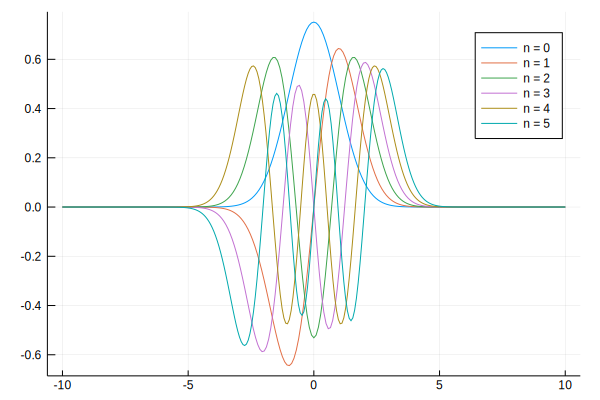

In [3]:
p = plot()
for n = 0:5
    H = Fun(Hermite(), [zeros(n);1])
    ψ = Fun(x -> H(x)exp(-x^2/2), -10.0 .. 10.0)/sqrt(sqrt(π)*2^n*factorial(1.0n))
    plot!(ψ; label="n = $n")
end
p

It's convention to shift them by the eigenvalue:

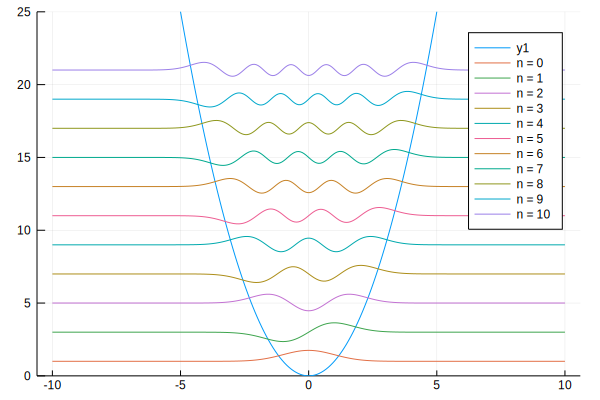

In [4]:
p = plot(pad(Fun(x -> x^2, -10 .. 10), 100); ylims=(0,25))
for n = 0:10
    H = Fun(Hermite(), [zeros(n);1])
    ψ = Fun(x -> H(x)exp(-x^2/2), -10.0 .. 10.0)/sqrt(sqrt(π)*2^n*factorial(1.0n))
    plot!(ψ + 2n+1; label="n = $n")
end
p